In [1]:
import pandas as pd 
pd.options.mode.chained_assignment = None 
import numpy as np 
import re 
import nltk 

from gensim.models import word2vec 
from gensim.models.word2vec import LineSentence

from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
false_data = pd.read_csv('fakedata.csv').sample(5000, replace = True, random_state = 23)
true_data = pd.read_csv('realdata.csv').sample(5000, replace = True, random_state = 23)

In [3]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('',val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS: 
            sentence.remove(word)
    
    sentence = " ".join(sentence)
    return sentence 

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = false_data.dropna(how= "any")
    
    for col in ['Headline']: 
        data[col] = data[col].apply(clean_sentence)
    return data 

false_data = clean_dataframe(false_data)
false_data.head(5)


,Unnamed: 0,Unnamed: 0.1,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
595,828,828,Fox News,The Biden administration pulled the plug on bo...,border county sheriff says sinaloa cartel brin...,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,68000.0,43000.0,15000.0,0,'FAKE'
742,1087,44,Conservative Post,Even Liberal Media Fed Up With Biden Administr...,even liberal media fed biden administration la...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,433.0,299.0,2800.0,0,'FAKE'
1064,1454,411,BBC,This 'patch of green' has always been importan...,patch green always important neha shes fightin...,https://www.facebook.com/bbc/?hc_ref=ARTPg1uVP...,https://www.facebook.com/bbc/?ref=nf&hc_ref=AR...,973.0,27.0,6200.0,0,'FAKE'
950,1334,291,Conservative Post,Tax paying Americans are being forced to pay f...,house covid bill includes 100 million controve...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,101.0,647.0,145.0,0,'FAKE'
31,51,51,CNN,The US Border Patrol has detained more than 11...,border patrol detained unaccompanied minors ma...,https://www.facebook.com/cnn/?__cft__[0]=AZXpa...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,617.0,1200.0,103.0,57,'FAKE'


In [4]:
true_data = clean_dataframe(true_data)

In [5]:
def build_corpus(data):
    corpus = []
    for col in ['Headline']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
    return corpus 

corpus = build_corpus(false_data)
print(len(corpus))

4327


In [6]:
model = word2vec.Word2Vec(corpus, size=1000, window=20, min_count=5, workers=4)

In [7]:
true_corpus = build_corpus(true_data)
print(len(true_corpus))

4327


In [8]:
model.save("word2vecmodel")

In [9]:
model_true = word2vec.Word2Vec(true_corpus, size=999, window=15, min_count=6, workers=4)

In [10]:
model_true.save("word2vecmodel_true")

In [13]:
def tsne_plot(model):
    labels = []
    tokens = []
    
    for word in model.wv.vocab: 
        tokens.append(model[word])
        labels.append(word)
     
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    for value in new_values: 
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(16,16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],xy=(x[i],y[i]),xytext=(5,2),textcoords='offset points',ha='right',va='bottom')
        if i >100:
            break 
    plt.show() 
      

<ipython-input-11-5cae18cd8d2e>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


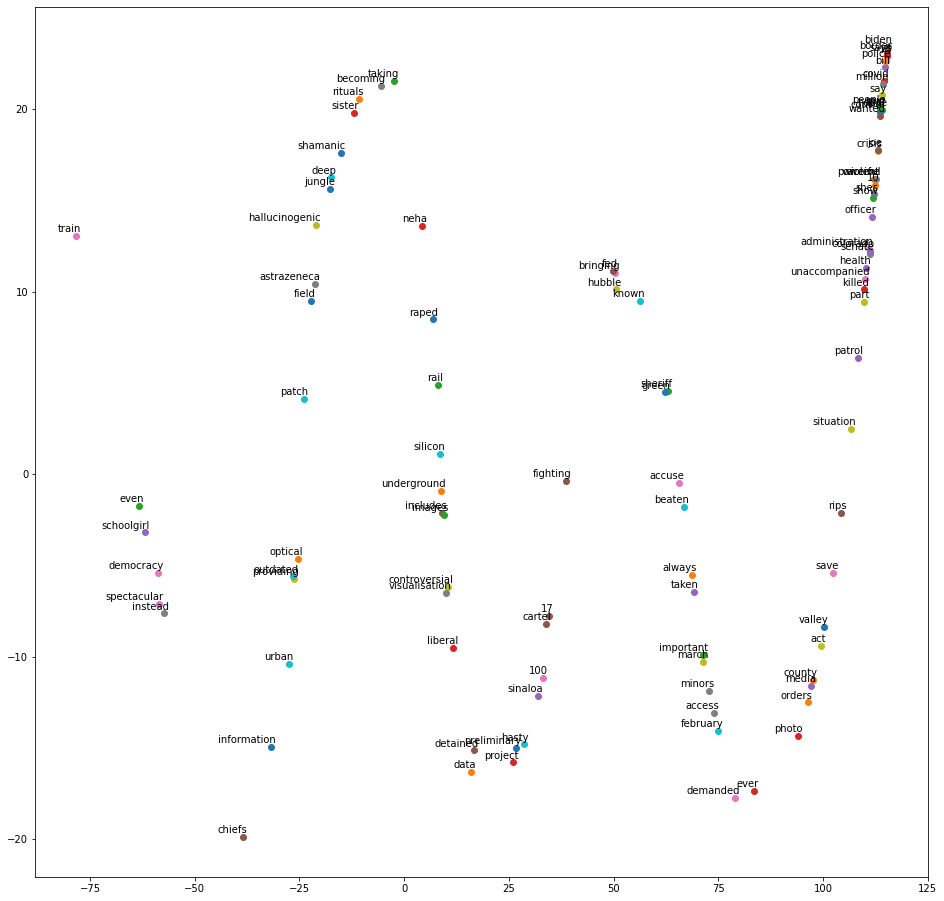

In [12]:
tsne_plot(model)


<ipython-input-13-e9d375a4c4ad>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


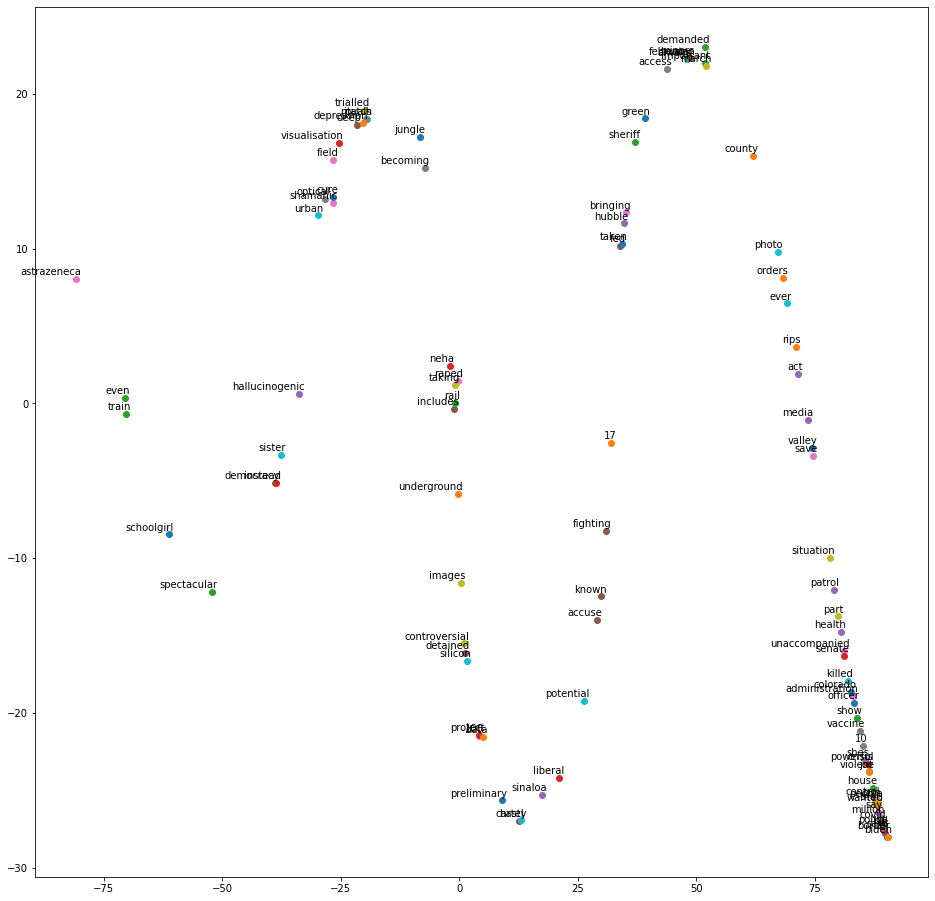

In [14]:
tsne_plot(model_true)


In [15]:
model.most_similar('trump')

<ipython-input-15-d253bc5c5242>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('trump')


[('biden', 0.9999820590019226),
 ('says', 0.9999799728393555),
 ('', 0.9999759197235107),
 ('border', 0.9999750852584839),
 ('new', 0.9999749660491943),
 ('us', 0.9999744892120361),
 ('covid', 0.9999653100967407),
 ('police', 0.9999650120735168),
 ('bill', 0.9999646544456482),
 ('first', 0.9999643564224243)]

In [16]:
model.most_similar('covid')

<ipython-input-16-2f9095781842>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('covid')


[('biden', 0.9999732375144958),
 ('', 0.9999726414680481),
 ('new', 0.9999716877937317),
 ('says', 0.9999687075614929),
 ('us', 0.9999659061431885),
 ('trump', 0.9999653100967407),
 ('border', 0.9999626874923706),
 ('bill', 0.9999606013298035),
 ('year', 0.9999603033065796),
 ('million', 0.9999595284461975)]

In [17]:
model.most_similar('democrat')

<ipython-input-17-de901d6125a9>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model.most_similar('democrat')


[('officials', 0.9953745603561401),
 ('police', 0.9953678846359253),
 ('migrant', 0.9953495264053345),
 ('bill', 0.9953491687774658),
 ('says', 0.9953484535217285),
 ('', 0.9953471422195435),
 ('capitol', 0.9953470230102539),
 ('school', 0.9953460693359375),
 ('border', 0.9953405857086182),
 ('back', 0.9953393936157227)]